## Experiment container

Non interessanti per noi.

The experiment container describes a set of experiments performed with the same *targeted area, imaging depth, and Cre line*. 

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')

In [2]:
# Download experiment containers
exp_container = boc.get_experiment_containers(targeted_structures=['VISp'],
                                              imaging_depths=[350])


pprint.pprint(exp_container[0:3])

[{'cre_line': 'Scnn1a-Tg3-Cre',
  'donor_name': '230570',
  'failed': False,
  'id': 511510911,
  'imaging_depth': 350,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'specimen_name': 'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'tags': [],
  'targeted_structure': 'VISp'},
 {'cre_line': 'Nr5a1-Cre',
  'donor_name': '248894',
  'failed': False,
  'id': 528792730,
  'imaging_depth': 350,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'specimen_name': 'Nr5a1-Cre;Camk2a-tTA;Ai93-248894',
  'tags': [],
  'targeted_structure': 'VISp'},
 {'cre_line': 'Sst-IRES-Cre',
  'donor_name': '297620',
  'failed': False,
  'id': 575940387,
  'imaging_depth': 350,
  'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
  'specimen_name': 'Sst-IRES-Cre;Ai148(CAM)-297620',
  'tags': [],
  'targeted_structure': 'VISp'}]


In [3]:
# Find all of the experiments for an experiment container

# cux2_ec contiene tutti gli experiment containers per cui cre_lines = ['Cux2-CreERT2']
exp_container_id = exp_container[0]['id']
# qui id è il container_id
# boc contiene gli experiment containers, non i singoli esperimenti

# esperimenti contenuti nel container 'id'
exps = boc.get_ophys_experiments(experiment_container_ids=[exp_container_id])
print("Experiments for experiment_container_id %d: %d\n" % (exp_container_id, len(exps)))
pprint.pprint(exps)

Experiments for experiment_container_id 511510911: 3

[{'acquisition_age_days': 85,
  'cre_line': 'Scnn1a-Tg3-Cre',
  'donor_name': '230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': False,
  'id': 508596945,
  'imaging_depth': 350,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'three_session_B',
  'specimen_name': 'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'targeted_structure': 'VISp'},
 {'acquisition_age_days': 84,
  'cre_line': 'Scnn1a-Tg3-Cre',
  'donor_name': '230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': True,
  'id': 508356957,
  'imaging_depth': 350,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'three_session_A',
  'specimen_name': 'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'targeted_structure': 'VISp'},
 {'acquisition_age_days': 77,
  'cre_line': 'Scnn1a-Tg3-Cre',
  'donor_name': '230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': True,
  'id': 506353473,
  'imaging_depth': 350,
  '

In [4]:
import allensdk.brain_observatory.stimulus_info as stim_info

# pick one of the cux2 experiment containers
exp_container_id = exp_container[0]['id']

# Find the experiment with the static static gratings stimulus
exp = boc.get_ophys_experiments(experiment_container_ids=[exp_container_id], 
                                stimuli=['static_gratings'])[0]
print("Experiment with drifting gratings:")
pprint.pprint(exp)

Experiment with drifting gratings:
{'acquisition_age_days': 85,
 'cre_line': 'Scnn1a-Tg3-Cre',
 'donor_name': '230570',
 'experiment_container_id': 511510911,
 'fail_eye_tracking': False,
 'id': 508596945,
 'imaging_depth': 350,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'session_type': 'three_session_B',
 'specimen_name': 'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
 'targeted_structure': 'VISp'}


In [5]:
exp['id']

508596945

In [12]:
exp = boc.get_ophys_experiment_data(exp['id']) # scarica l'esperimento con id exp['id']

# print out the metadata available in the NWB file
pprint.pprint(exp.get_metadata())

OSError: Unable to open file (truncated file: eof = 73137803, sblock->base_addr = 0, stored_eof = 368067225)

In [3]:
import allensdk.brain_observatory.stimulus_info as stim_info

# find experiment containers for those cells
#dsi_ec_ids = dsi_cells['experiment_container_id'].unique()
#print("total dsi experiment containers: %d" % len(dsi_ec_ids))

# Download the ophys experiments containing the drifting gratings stimulus for VISp experiment containers
dsi_exps = boc.get_ophys_experiments(experiment_container_ids=[511510911], stimuli=[stim_info.STATIC_GRATINGS])
print("VISp static gratings ophys experiments: %d" % len(dsi_exps))

print("Example ophys experiment:")
pprint.pprint(dsi_exps[0])

VISp static gratings ophys experiments: 1
Example ophys experiment:
{'acquisition_age_days': 85,
 'cre_line': 'Scnn1a-Tg3-Cre',
 'donor_name': '230570',
 'experiment_container_id': 511510911,
 'fail_eye_tracking': False,
 'id': 508596945,
 'imaging_depth': 350,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'session_type': 'three_session_B',
 'specimen_name': 'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
 'targeted_structure': 'VISp'}


In [5]:
import allensdk.brain_observatory.stimulus_info as stim_info

experiment = boc.get_ophys_experiments(experiment_container_ids=[511510911], 
                                        stimuli=[stim_info.STATIC_GRATINGS])
print("Number of experiments: %d" % len(experiment))

experiment

Number of experiments: 1


[{'id': 508596945,
  'imaging_depth': 350,
  'targeted_structure': 'VISp',
  'cre_line': 'Scnn1a-Tg3-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 85,
  'experiment_container_id': 511510911,
  'session_type': 'three_session_B',
  'donor_name': '230570',
  'specimen_name': 'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'fail_eye_tracking': False}]

In [11]:
# pick a direction-selective cell and find its NWB file

#dsi_cell = dsi_cells.iloc[0]

# figure out which ophys experiment has the drifting gratings stimulus for that cell
#cell_exp = boc.get_ophys_experiments(cell_specimen_ids=['508596945'])#,
                                #     stimuli=[stim_info.STATIC_GRATINGS])[0]

data_set = boc.get_ophys_experiment_data(508596945)#cell_exp['id'])

print("Metadata from NWB file:")
pprint.pprint(data_set.get_metadata())

print("stimuli available in this file:")
print(data_set.list_stimuli())

OSError: Unable to open file (truncated file: eof = 73137803, sblock->base_addr = 0, stored_eof = 368067225)

In [16]:
dsi_cell_id = dsi_cell['cell_specimen_id']
time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[dsi_cell_id])
_, demixed_traces = data_set.get_demixed_traces(cell_specimen_ids=[dsi_cell_id])
_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[dsi_cell_id])
_, corrected_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=[dsi_cell_id])
_, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[dsi_cell_id])

NameError: name 'dsi_cell' is not defined

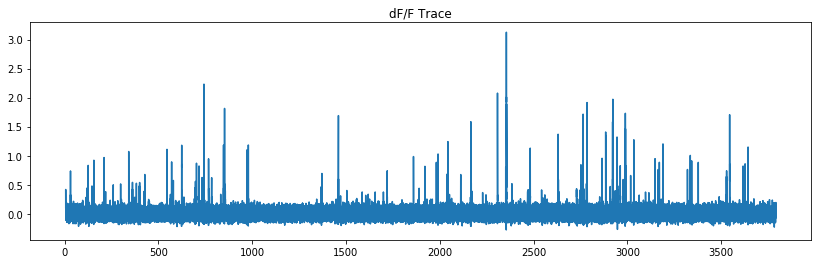

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
# warning: dF/F can occasionally be one element longer or shorter 
# than the time stamps for the original traces.
plt.plot(time[:len(dff_traces[0])], dff_traces[0])
plt.show()

In [106]:
dff_traces[0]

array([0.10652547, 0.41706055, 0.10137907, ..., 0.19285968, 0.08208285,
       0.0574945 ], dtype=float32)

In [18]:
df = pd.DataFrame(dff_traces[0])
df.to_csv('cellula2.csv',index=False)

In [19]:
len(dff_traces[0])

113864

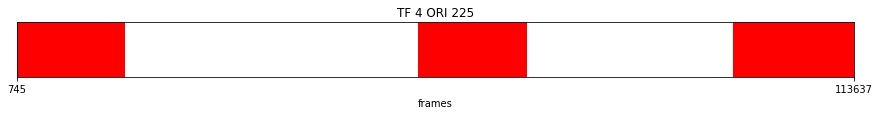

In [108]:

# this is a pandas DataFrame. find trials with a given stimulus condition.
temporal_frequency = 4
orientation = 225
stim_table = data_set.get_stimulus_table('static_gratings')
#stim_table = stim_table[(stim_table.temporal_frequency == temporal_frequency) & (stim_table.orientation == orientation)]

# plot the trials
plot_stimulus_table(stim_table, "TF %d ORI %d" % (temporal_frequency, orientation))

In [122]:
stim_table
stim_table.to_csv('static_grating.csv',index=False)

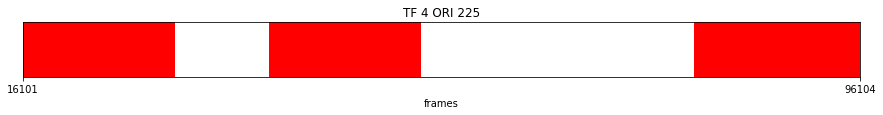

In [112]:

# this is a pandas DataFrame. find trials with a given stimulus condition.
stim_table2 = data_set.get_stimulus_table('natural_scenes')

# plot the trials
plot_stimulus_table(stim_table2, "TF %d ORI %d" % (temporal_frequency, orientation))

In [123]:
stim_table2
stim_table2.to_csv('natural_scene.csv',index=False)

In [124]:
stim_table3 = data_set.get_stimulus_table('natural_movie_one')
stim_table3.to_csv('natural_movie_one.csv',index=False)

In [125]:
stim_table4 = data_set.get_stimulus_table('spontaneous')
stim_table4.to_csv('spontaneous.csv',index=False)